In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import re


In [2]:
train_df = pd.read_csv("Divar.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_19264\960344712.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Divar.csv")


In [3]:
train_df.iloc[:,23:25].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   land_size      186396 non-null  float64
 1   building_size  980394 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [4]:
print("nan Counts for land Size:")
for item in train_df.cat3_slug.unique():
    selected_land_size = train_df[train_df.cat3_slug == item]["land_size"]
    nan_count = selected_land_size.isna().sum()
    if len(selected_land_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_land_size)} %")

del selected_land_size

print("\n\nnan Counts for building Size:")
for item in train_df.cat3_slug.unique():
    selected_bld_size = train_df[train_df.cat3_slug == item]["building_size"]
    nan_count = selected_bld_size.isna().sum()
    if len(selected_bld_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_bld_size)} %")

del selected_bld_size

nan Counts for land Size:
nan count for villa =  12899 - 100.0 %
nan count for apartment-sell =  303385 - 100.0 %
nan count for apartment-rent =  211880 - 100.0 %
nan count for office-rent =  21418 - 100.0 %
nan count for shop-sell =  21855 - 100.0 %
nan count for plot-old =  133569 - 99.99925132889122 %
nan count for house-villa-sell =  18 - 0.014784029962300724 %
nan count for house-villa-rent =  18 - 0.027830174093200162 %
nan count for shop-rent =  45993 - 100.0 %
nan count for industry-agriculture-business-rent =  9155 - 100.0 %
nan count for office-sell =  5155 - 100.0 %
nan count for industry-agriculture-business-sell =  11851 - 100.0 %
nan count for presell =  15781 - 100.0 %
nan count for suite-apartment =  16465 - 100.0 %
nan count for partnership =  3622 - 100.0 %
nan count for workspace =  539 - 100.0 %


nan Counts for building Size:
nan count for villa =  1 - 0.007752538956508256 %
nan count for apartment-sell =  5 - 0.0016480709329729551 %
nan count for apartment-rent = 

In [3]:
df_subset = pd.concat([train_df.iloc[:, :3],train_df.iloc[:, 6:10],train_df.iloc[:, 23:25]], axis=1)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1000000 non-null  int64  
 1   cat2_slug      1000000 non-null  object 
 2   cat3_slug      999999 non-null   object 
 3   user_type      288882 non-null   object 
 4   description    1000000 non-null  object 
 5   title          999946 non-null   object 
 6   rent_mode      352994 non-null   object 
 7   land_size      186396 non-null   float64
 8   building_size  980394 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


## Land & Improvements vs land_size & building_size

In [5]:
df_subset["Land"] = np.nan
df_subset["Improvements"] = 0

In [44]:
print("nan Counts for Land Size:")
for item in df_subset.cat3_slug.unique():
    selected_land_size = df_subset[df_subset.cat3_slug == item]["land_size"]
    nan_count = selected_land_size.isna().sum()
    if len(selected_land_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_land_size)} %")

del selected_land_size

print("\n\nnan Counts for Building Size:")
for item in df_subset.cat3_slug.unique():
    selected_bld_size = df_subset[df_subset.cat3_slug == item]["building_size"]
    nan_count = selected_bld_size.isna().sum()
    if len(selected_bld_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_bld_size)} %")

del selected_bld_size

nan Counts for Land Size:
nan count for villa =  12899 - 100.0 %
nan count for apartment-sell =  303385 - 100.0 %
nan count for apartment-rent =  211880 - 100.0 %
nan count for office-rent =  21418 - 100.0 %
nan count for shop-sell =  21855 - 100.0 %
nan count for plot-old =  133569 - 99.99925132889122 %
nan count for house-villa-sell =  18 - 0.014784029962300724 %
nan count for house-villa-rent =  18 - 0.027830174093200162 %
nan count for shop-rent =  45993 - 100.0 %
nan count for industry-agriculture-business-rent =  9155 - 100.0 %
nan count for office-sell =  5155 - 100.0 %
nan count for industry-agriculture-business-sell =  11851 - 100.0 %
nan count for presell =  15781 - 100.0 %
nan count for suite-apartment =  16465 - 100.0 %
nan count for partnership =  3622 - 100.0 %
nan count for workspace =  539 - 100.0 %


nan Counts for Building Size:
nan count for villa =  1 - 0.007752538956508256 %
nan count for apartment-sell =  5 - 0.0016480709329729551 %
nan count for apartment-rent = 

### villa

In [6]:
villa_mask = ((df_subset.cat3_slug == "villa"))
print(f"total villa: {villa_mask.sum()}")
nan_bld_villa_mask = (villa_mask & (df_subset.building_size.isna()))
print(f"nan bld villa: {nan_bld_villa_mask.sum()}")
nan_lnd_villa_mask = (villa_mask & (df_subset.land_size.isna()))
print(f"nan land villa: {nan_lnd_villa_mask.sum()}")

total villa: 12899
nan bld villa: 1
nan land villa: 12899


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key=("OPENAI_API_KEY"))

def extract_villa_sizes_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads. Extract the land size and building size for each ad.
    First part is the title, and second part is the description.
    Every item belongs to the villa category.
    Rules:
    1. Return exactly two values for each ad: land_size (m²) and building_size (m²).
    2. Convert all numbers from Persian digits or Persian words into Arabic numerals.
    3. For land_size, only consider numbers explicitly referring to زمین, قطعه, هکتار, متر زمین, زمین مزروعی.
    4. For building_size, only consider numbers explicitly referring to بنا, ساختمان, زیربنا, متر بنا.
    5. Ignore unrelated numbers (distances, addresses, phone numbers, prices, etc.).
    6. If only one of land_size or building_size exists, return the other as null.
    7. If neither is mentioned, return both as null.
    8. The output must be a JSON array in the same order as the ads, with objects like:
    [
     {{"land_size": 320, "building_size": 180}},
     {{"land_size": null, "building_size": 120}},
     {{"land_size": 450, "building_size": null}},
     {{"land_size": null, "building_size": null}}
    ]
    Do not include explanations or extra text.
    Examples:
    - "زمین ۳۲هزار متر متل قو" -> {{"land_size": 32000, "building_size": null}}
    - "۱۱۳ متر مربع بدون مشابه" -> {{"land_size": 113, "building_size": null}}
    - "زمین کشاورزی / ۲۱۸۰ متر / قشلاق امرآباد" -> {{"land_size": 2180, "building_size": null}}
    - "زمین چهار دیواری در منطقه" -> {{"land_size": null, "building_size": null}}
    - "ده هکتار زمین کشاورزی" -> {{"land_size": 100000, "building_size": null}}
    - "ویلا 200 متر در زمین 500 متری" -> {{"land_size": 500, "building_size": 200}}
    - "زمین 20 در 30" -> {{"land_size": 600, "building_size": null}}

    Now process the following ads:
    {ads_text}
        """
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')


    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except:
        results = [None] * len(texts)
        print("Whole null")

    return results



persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه",
    "شصت","هفتاد","هشتاد","نود","صد","یکصد","دویست",
    "سیصد","چهارصد","پانصد","ششصد","هفتصد","هشتصد","نهصد",
    "هزار","میلیون","میلیارد","هکتار","قصب","جریب"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [ ]:
import tqdm

BATCH_SIZE = 15

mask = (villa_mask & nan_lnd_villa_mask)
rows_to_process = df_subset[mask]

if "land_size_ai" not in df_subset.columns:
    df_subset["land_size_ai"] = np.nan
if "building_size_ai" not in df_subset.columns:
    df_subset["building_size_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"), axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}" for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    results = extract_villa_sizes_batch(texts)
    
    for idx, result in zip(batch_rows_filtered.index, results):
        if (result is None) or (not isinstance(result, dict)):
            df_subset.loc[idx, "land_size_ai"] = np.nan
            df_subset.loc[idx, "building_size_ai"] = np.nan
            continue
        
        land_val = result.get("land_size")
        bld_val = result.get("building_size")

        df_subset.loc[idx, "land_size_ai"] = land_val if (land_val and land_val > 0) else np.nan
        df_subset.loc[idx, "building_size_ai"] = bld_val if (bld_val and bld_val > 0) else np.nan


    results.clear()

100%|██████████| 860/860 [1:02:18<00:00,  4.35s/it]


In [7]:
df_subset["land_size_ai"] =  pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\villa_land_ai.csv")["land_size_ai"]
df_subset["building_size_ai"] =  pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\villa_bld_ai.csv")["building_size_ai"]

In [8]:
print(f"total villa: {villa_mask.sum()}")
bld_ai_villa_mask = (villa_mask & ~(df_subset.building_size_ai.isna()))
print(f"bld ai villa: {bld_ai_villa_mask.sum()}")
lnd_ai_villa_mask = (villa_mask & ~(df_subset.land_size_ai.isna()))
print(f"land ai villa: {lnd_ai_villa_mask.sum()}")


total villa: 12899
bld ai villa: 2076
land ai villa: 2348


In [9]:
combined_lnd_mask = lnd_ai_villa_mask & ~nan_bld_villa_mask

df_subset.loc[combined_lnd_mask, "dif_lnd"] = np.abs(
    df_subset.loc[combined_lnd_mask, "land_size_ai"] - df_subset.loc[combined_lnd_mask, "building_size"])

df_subset.loc[villa_mask & df_subset["dif_lnd"].notna(), "dif_lnd"].value_counts()

dif_lnd
0.0         1327
100.0         73
200.0         54
50.0          50
500.0         46
            ... 
720000.0       1
1165.0         1
140.0          1
19000.0        1
725.0          1
Name: count, Length: 321, dtype: int64

In [10]:
combined_bld_mask = bld_ai_villa_mask & ~nan_bld_villa_mask

df_subset.loc[combined_bld_mask, "dif_bld"] = np.abs(
    df_subset.loc[combined_bld_mask, "building_size_ai"] - df_subset.loc[combined_bld_mask, "building_size"])

df_subset.loc[villa_mask & df_subset["dif_bld"].notna(), "dif_bld"].value_counts()

dif_bld
0.0       419
300.0      72
400.0      64
500.0      52
600.0      49
         ... 
665.0       1
1550.0      1
875.0       1
3900.0      1
245.0       1
Name: count, Length: 287, dtype: int64

It can probably be concluded that the values in building_size belong to the land_size column.

In [11]:
df_subset.loc[lnd_ai_villa_mask, "land_size"] = df_subset.loc[lnd_ai_villa_mask, "land_size_ai"]

nan_ai_lnd_villa = ((df_subset.land_size_ai.isna()) & (villa_mask))
df_subset.loc[nan_ai_lnd_villa, "land_size"] = df_subset.loc[nan_ai_lnd_villa, "building_size"]

df_subset.loc[villa_mask, "building_size"] = 0

both_ai_villa = (~(df_subset.land_size_ai.isna()) & ~(df_subset.building_size_ai.isna()))
df_subset.loc[both_ai_villa, "building_size"] = df_subset.loc[both_ai_villa, "building_size_ai"]

df_subset.loc[villa_mask, "Land"] = df_subset.loc[villa_mask, "land_size"]
df_subset.loc[villa_mask, "Improvements"] = df_subset.loc[villa_mask, "building_size"]

In [12]:
print("nan Land villa: ", df_subset.loc[villa_mask, "Land"].isna().sum())
print("nan Improvements villa: ", df_subset.loc[villa_mask, "Improvements"].isna().sum())

nan Land villa:  1
nan Improvements villa:  0


In [13]:
del nan_bld_villa_mask, nan_lnd_villa_mask , villa_mask, nan_ai_lnd_villa, both_ai_villa, combined_bld_mask, combined_lnd_mask

df_subset.drop(["land_size_ai", "building_size_ai"], axis=1, inplace=True)

### plot-old

In [14]:
po_mask = ((df_subset.cat3_slug == "plot-old"))
print(f"total plot-old: {po_mask.sum()}")
nan_bld_po_mask = (po_mask & (df_subset.building_size.isna()))
print(f"nan bld plot-old: {nan_bld_po_mask.sum()}")
nan_lnd_po_mask = (po_mask & (df_subset.land_size.isna()))
print(f"nan land plot-old: {nan_lnd_po_mask.sum()}")

total plot-old: 133570
nan bld plot-old: 11
nan land plot-old: 133569


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key=("OPENAI_API_KEY"))

def extract_land_sizes_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads. Extract the land size for each ad.

    Rules:
    1. Return only a single number representing the land size in square meters.
    2. Convert all numbers from Persian digits or Persian words to digits.
    3. Only consider numbers that refer to land area (units like متر, هکتار, قطعه, زمین مزروعی).
    4. Ignore unrelated numbers (distances, addresses, phone numbers, etc.).
    5. If no land size is mentioned, return null.
    6. Return only a JSON array of numbers or nulls, in the same order as the ads. Example: [32000, null, 2180, ...]
    7. Do not include explanations or extra text.

    Examples:
    - "زمین ۳هزار متر متل قو" -> 3000
    - "۱۱۳ متر مربع بدون مشابه" -> 113
    - "زمین کشاورزی / ۲۱۸۰ متر / قشلاق امرآباد" -> 2180
    - "زمین چهار دیواری در منطقه" -> null
    - "ده هکتار زمین" -> 100000
    - "ویلا 200 متر در زمین 500 متری" -> 500
    - "زمین 20 در 30" -> 600

    Now process the following ads:
    {ads_text}
        """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')


    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except:
        results = [None] * len(texts)
        print("Whole null")

    return results



persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه",
    "شصت","هفتاد","هشتاد","نود","صد","یکصد","دویست",
    "سیصد","چهارصد","پانصد","ششصد","هفتصد","هشتصد","نهصد",
    "هزار","میلیون","میلیارد","هکتار","قصب","جریب"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [563]:
import tqdm

BATCH_SIZE = 15
N_LIMIT = 50000

mask = ((df_subset.cat3_slug == "plot-old") & (df_subset.land_size.isna()))
rows_to_process = df_subset[mask].head(N_LIMIT)

if "lnd_size_po_ai" not in df_subset.columns:
    df_subset["lnd_size_po_ai"] = None


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"),
        axis=1
    )
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [
        f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()
    ]
    
    if not texts:
        continue
    
    land_sizes = extract_land_sizes_batch(texts)
    
    for idx, value in zip(batch_rows_filtered.index, land_sizes):
        if value is None:
            df_subset.loc[idx, "lnd_size_po_ai"] = np.nan
        elif isinstance(value, list):
            df_subset.loc[idx, "lnd_size_po_ai"] = np.nan
        else:
            df_subset.loc[idx, "lnd_size_po_ai"] = value if value > 0 else np.nan

    land_sizes.clear()

 36%|███▌      | 1184/3334 [27:47<58:54,  1.64s/it]  

Whole null


100%|██████████| 3334/3334 [1:28:44<00:00,  1.60s/it]  


In [575]:
pd.DataFrame.to_csv(df_subset.lnd_size_po_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\po_land_ai.csv")

In [15]:
df_subset["po_land_ai"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\po_land_ai.csv")["lnd_size_po_ai"]

In [16]:
lnd_po_ai_mask = (po_mask & ~(df_subset.po_land_ai.isna()))
print(f"land ai plot-old: {lnd_po_ai_mask.sum()}")

land ai plot-old: 35308


In [17]:
bld_po_mask = (~(df_subset.po_land_ai.isna()) & ~(df_subset.building_size.isna()))
df_subset["dif_po"] = np.nan

df_subset.loc[bld_po_mask, "dif_po"] = np.abs(df_subset.loc[bld_po_mask, "po_land_ai"] - 
                                              df_subset.loc[bld_po_mask, "building_size"])
df_subset.dif_po.value_counts()

dif_po
0.0       30622
1.0         179
100.0       127
10.0        124
2.0         108
          ...  
2275.0        1
2555.0        1
2850.0        1
7579.0        1
728.0         1
Name: count, Length: 1343, dtype: int64

Almost 90% of data in land_size_ai are similar to their correspond in building_size column.

by a quick check i realised that sometimes land_size_ai is more reasinable, and sometimes land_size_ai.

So I decided to fill the rest missing values of land_size with correspond building_size fot plot_old category.

In [18]:
po_ai_mask = ~(df_subset.po_land_ai.isna())
df_subset.loc[po_ai_mask, "land_size"] = df_subset.loc[po_ai_mask, "po_land_ai"]

po_mask2 = (df_subset.po_land_ai.isna() & (po_mask))
df_subset.loc[po_mask2, "land_size"] = df_subset.loc[po_mask2, "building_size"]

df_subset.loc[po_mask, "building_size"] = 0

In [19]:
df_subset.loc[po_mask, "Land"] = df_subset.loc[po_mask, "land_size"]
df_subset.loc[po_mask, "Improvements"] = 0

In [20]:
print("nan Land po: ", df_subset.loc[po_mask, "Land"].isna().sum())
print("nan Improvements po: ", df_subset.loc[po_mask, "Improvements"].isna().sum())

nan Land po:  7
nan Improvements po:  0


In [21]:
del po_mask , po_mask2, lnd_po_ai_mask, bld_po_mask

df_subset.drop(["po_land_ai"], axis=1, inplace=True)

### house-villa-sell - house-villa-rent

In [22]:
hv_mask = ((df_subset.cat3_slug == "house-villa-sell") | (df_subset.cat3_slug == "house-villa-rent"))
print(f"total hv: {hv_mask.sum()}")

hv_both_mask = (hv_mask & (~(df_subset.land_size.isna())) & (~(df_subset.building_size.isna()))) 
print(f"both hv: {hv_both_mask.sum()}")

only_bld_hv = (hv_mask & (~(df_subset.building_size.isna())) & (df_subset.land_size.isna()))
print(f"only_bld_hv: {only_bld_hv.sum()}")

only_lnd_hv = (hv_mask & (~(df_subset.land_size.isna())) & (df_subset.building_size.isna()))
print(f"only_lnd_hv: {only_lnd_hv.sum()}")

hv_little_land = (hv_mask & (df_subset.land_size <= 15))
print(f"hv_little_land: {hv_little_land.sum()}")

df_subset.loc[hv_little_land , "land_size"] = np.nan

hv_little_bld = (hv_mask & (df_subset.building_size <= 15))
print(f"hv_little_bld: {hv_little_bld.sum()}")


total hv: 186431
both hv: 186395
only_bld_hv: 10
only_lnd_hv: 0
hv_little_land: 500
hv_little_bld: 2156


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key=("OPENAI_API_KEY"))

def extract_villa_sizes_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads. Extract the land size and building size for each ad.
    First part is the title, and second part is the description.
    Every item belongs to the villa house category.
    Rules:
    1. Return exactly two values for each ad: land_size (m²) and building_size (m²).
    2. Convert all numbers from Persian digits or Persian words into Arabic numerals.
    3. For land_size, only consider numbers explicitly referring to زمین, قطعه, هکتار, متر زمین, زمین مزروعی.
    4. For building_size, only consider numbers explicitly referring to بنا, ساختمان, زیربنا, متر بنا.
    5. Ignore unrelated numbers (distances, addresses, phone numbers, prices, etc.).
    6. If only one of land_size or building_size exists, return the other as null.
    7. If neither is mentioned, return both as null.
    8. The output must be a JSON array in the same order as the ads, with objects like:
    [
     {{"land_size": 320, "building_size": 180}},
     {{"land_size": null, "building_size": 120}},
     {{"land_size": 450, "building_size": null}},
     {{"land_size": null, "building_size": null}}
    ]
    Do not include explanations or extra text.
    Examples:
    - "زمین ۳۲هزار متر متل قو" -> {{"land_size": 32000, "building_size": null}}
    - "۱۱۳ متر مربع بدون مشابه" -> {{"land_size": 113, "building_size": null}}
    - "زمین کشاورزی / ۲۱۸۰ متر / قشلاق امرآباد" -> {{"land_size": 2180, "building_size": null}}
    - "زمین چهار دیواری در منطقه" -> {{"land_size": null, "building_size": null}}
    - "ویلا 200 متر در زمین 500 متری" -> {{"land_size": 500, "building_size": 200}}
    - "زمین 20 در 30" -> {{"land_size": 600, "building_size": null}}

    Now process the following ads:
    {ads_text}
        """
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')


    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except:
        results = [None] * len(texts)
        print("Whole null")

    return results



persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه",
    "شصت","هفتاد","هشتاد","نود","صد","یکصد","دویست",
    "سیصد","چهارصد","پانصد","ششصد","هفتصد","هشتصد","نهصد",
    "هزار","میلیون","میلیارد","هکتار","قصب","جریب"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [ ]:
import tqdm

BATCH_SIZE = 15

mask = (((df_subset.land_size.isna()) | (df_subset.building_size.isna())) & (((df_subset.cat3_slug == "house-villa-sell") | (df_subset.cat3_slug == "house-villa-rent"))))
rows_to_process = df_subset[mask]

if "land_hv_ai" not in df_subset.columns:
    df_subset["land_hv_ai"] = np.nan
if "building_hv_ai" not in df_subset.columns:
    df_subset["building_hv_ai"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"), axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}" for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    results = extract_villa_sizes_batch(texts)
    
    for idx, result in zip(batch_rows_filtered.index, results):
        if (result is None) or (not isinstance(result, dict)):
            df_subset.loc[idx, "land_hv_ai"] = np.nan
            df_subset.loc[idx, "building_hv_ai"] = np.nan
            continue
        
        land_val = result.get("land_size")
        bld_val = result.get("building_size")

        df_subset.loc[idx, "land_hv_ai"] = land_val if (land_val and land_val > 0) else np.nan
        df_subset.loc[idx, "building_hv_ai"] = bld_val if (bld_val and bld_val > 0) else np.nan


    results.clear()

  7%|▋         | 171/2572 [15:24<3:09:47,  4.74s/it]

Whole null


 29%|██▉       | 745/2572 [57:46<2:40:23,  5.27s/it]

Whole null


 74%|███████▎  | 1895/2572 [2:32:24<51:36,  4.57s/it]   

Whole null


100%|██████████| 2572/2572 [3:26:09<00:00,  4.81s/it]  


### این ها اصن به کار نیومد فقط حیفم اومد حذفش کنم

In [ ]:
pd.DataFrame.to_csv(df_subset.land_hv_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\land_hv_ai.csv")
pd.DataFrame.to_csv(df_subset.building_hv_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\building_hv_ai.csv")

In [740]:
import tqdm

BATCH_SIZE = 10

mask = (((df_subset.land_size.isna()) | (df_subset.building_size.isna())) & (((df_subset.cat3_slug == "house-villa-sell") | (df_subset.cat3_slug == "house-villa-rent"))))
rows_to_process = df_subset[mask]

if "land_hv_ai2" not in df_subset.columns:
    df_subset["land_hv_ai2"] = np.nan
if "building_hv_ai2" not in df_subset.columns:
    df_subset["building_hv_ai2"] = np.nan


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"), axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}" for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    results = extract_villa_sizes_batch(texts)
    
    for idx, result in zip(batch_rows_filtered.index, results):
        if (result is None) or (not isinstance(result, dict)):
            df_subset.loc[idx, "land_hv_ai2"] = np.nan
            df_subset.loc[idx, "building_hv_ai2"] = np.nan
            continue
        
        land_val = result.get("land_size")
        bld_val = result.get("building_size")

        df_subset.loc[idx, "land_hv_ai2"] = land_val if (land_val and land_val > 0) else np.nan
        df_subset.loc[idx, "building_hv_ai2"] = bld_val if (bld_val and bld_val > 0) else np.nan


    results.clear()

100%|██████████| 54/54 [04:14<00:00,  4.72s/it]


In [743]:
pd.DataFrame.to_csv(df_subset.land_hv_ai2, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\land_hv_ai2.csv")
pd.DataFrame.to_csv(df_subset.building_hv_ai2, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\building_hv_ai2.csv")

In [23]:
df_subset["land_hv_ai2"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\land_hv_ai2.csv")["land_hv_ai2"]
df_subset["building_hv_ai2"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\building_hv_ai2.csv")["building_hv_ai2"]

In [24]:
hv_mask = ((df_subset.cat3_slug == "house-villa-sell") | 
           (df_subset.cat3_slug == "house-villa-rent"))
print(f"total house-villa: {hv_mask.sum()}")

bld_hv_mask = (hv_mask & ~(df_subset.building_hv_ai2.isna()))
print(f"bld ai house-villa: {bld_hv_mask.sum()}")

lnd_hv_mask = (hv_mask & ~(df_subset.land_hv_ai2.isna()))
print(f"land ai house-villa: {lnd_hv_mask.sum()}")

hv_both_ai_mask = (hv_mask & ~(df_subset.land_hv_ai2.isna()) & 
                   ~(df_subset.building_hv_ai2.isna()))
print(f"both ai house-villa: {hv_both_ai_mask.sum()}")

hv_little_land_ai = (hv_mask & (df_subset.land_hv_ai2 <= 15))
print(f"hv_little_land ai: {hv_little_land_ai.sum()}")

df_subset.loc[hv_little_land , "land_hv_ai2"] = np.nan
hv_little_bld = (hv_mask & (df_subset.building_hv_ai2 <= 10))
print(f"hv_little_bld ai: {hv_little_bld.sum()}")

df_subset.loc[hv_little_bld , "building_hv_ai2"] = np.nan

total house-villa: 186431
bld ai house-villa: 101
land ai house-villa: 55
both ai house-villa: 27
hv_little_land ai: 3
hv_little_bld ai: 1


In [25]:
df_subset.loc[lnd_hv_mask, "land_size"] = df_subset.loc[lnd_hv_mask, "land_hv_ai2"]
df_subset.loc[bld_hv_mask, "building_size"] = df_subset.loc[bld_hv_mask, "building_hv_ai2"]

df_subset.loc[hv_mask, "Land"] = df_subset.loc[hv_mask, "land_size"]
df_subset.loc[hv_mask, "Improvements"] = df_subset.loc[hv_mask, "building_size"]

In [26]:
print("nan Land hv: ", df_subset.loc[hv_mask, "Land"].isna().sum())
print("nan Improvements hv: ", df_subset.loc[hv_mask, "Improvements"].isna().sum())

nan Land hv:  520
nan Improvements hv:  16


In [27]:
del hv_mask, bld_hv_mask , lnd_hv_mask, hv_both_ai_mask, hv_little_bld, hv_little_land_ai

df_subset.drop(["land_hv_ai2", "building_hv_ai2"], axis=1, inplace=True)

### presell

In [28]:
ps_mask = ((df_subset.cat3_slug == "presell"))
print(f"total presell: {ps_mask.sum()}")
nan_bld_ps_mask = (ps_mask & (df_subset.building_size.isna()))
print(f"nan bld presell: {nan_bld_ps_mask.sum()}")
nan_lnd_ps_mask = (ps_mask & (df_subset.land_size.isna()))
print(f"nan land presell: {nan_lnd_ps_mask.sum()}")

total presell: 15781
nan bld presell: 15776
nan land presell: 15781


In [ ]:
import re
import json
from openai import OpenAI

client = OpenAI(api_key="OPENAI_API_KEY")

def extract_presell_sizes_batch(texts):
    ads_text = "\n\n".join([f"{i+1}. {t}" for i, t in enumerate(texts)])

    prompt = f"""
    The following texts are Persian real estate ads from the **presell** category.
    Extract the *main property size* (in square meters) for each ad.

    **Rules:**
    1. Return only a single number representing the main property size.
    2. Convert all Persian digits and Persian words to standard digits.
    3. Accept both *land area* and *building area* depending on context:
        - For apartments or presell units → use building size (متراژ بنا / واحد / آپارتمان).
        - For villas, plots, or land → use land size (زمین / عرصه / مساحت کل).
    4. Ignore unrelated numbers (distance, price, phone, address, etc.).
    5. If no size is mentioned, return null.
    6. Handle formats like:
        - "زمین ۲۰ در ۳۰" → 600
        - "ویلا ۲۵۰ متر در زمین ۵۰۰ متری" → 500
    7. Return only a valid JSON array of numbers or nulls in the same order as the ads.

    **Examples:**
    - "پیش فروش آپارتمان ۱۵۰ متری" → 150  
    - "ویلا ۲۵۰ متر در زمین ۵۰۰ متری" → 500  
    - "زمین به متراژ ۴۸۰ متر" → 480  
    - "زمین ۲۰ در ۳۰" → 600  
    - "زمین مناسب ساخت و ساز" → null  
    - "پیش فروش واحد ۲۱۰ متری نوساز" → 210  
    - "فروش زمین و بنا ۲۲۰ متر" → 220  

    Now process the following ads:
    {ads_text}
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
    )

    raw = response.choices[0].message.content.strip()
    raw_clean = raw.strip('`').replace('json\n', '')

    try:
        results = json.loads(raw_clean)
        if not isinstance(results, list):
            raise ValueError("Not a list")
    except:
        results = [None] * len(texts)
        print("Whole null")

    return results


persian_numbers = [
    "یک","دو","سه","چهار","پنج","شش","هفت","هشت","نه","ده",
    "یازده","دوازده","سیزده","چهارده","پانزده","شانزده",
    "هفده","هجده","نوزده","بیست","سی","چهل","پنجاه",
    "شصت","هفتاد","هشتاد","نود","صد","یکصد","دویست",
    "سیصد","چهارصد","پانصد","ششصد","هفتصد","هشتصد","نهصد",
    "هزار","میلیون","میلیارد","هکتار","قصب","جریب"]


digit_pattern = re.compile(r'[\d۰-۹]')

def has_number_info(text: str) -> bool:
    # Check digits
    if digit_pattern.search(text):
        return True
    # Check Persian number words
    for w in persian_numbers:
        if w in text:
            return True
    return False


In [78]:
import tqdm

BATCH_SIZE = 15
N_LIMIT = 15781

mask = ((ps_mask) & (df_subset.land_size.isna()))
rows_to_process = df_subset[mask].head(N_LIMIT)

if "land_size_ai" not in df_subset.columns:
    df_subset["land_size_ai"] = None


for start in tqdm.tqdm(range(0, len(rows_to_process), BATCH_SIZE)):
    batch_rows = rows_to_process.iloc[start:start+BATCH_SIZE]

    mask_batch = batch_rows.apply(
        lambda row: has_number_info(f"{row['title']} {row['description']}"),
        axis=1)
    batch_rows_filtered = batch_rows[mask_batch]

    texts = [f"{row['title']}. {row['description']}"
        for _, row in batch_rows_filtered.iterrows()]
    
    if not texts:
        continue
    
    land_size_list = extract_presell_sizes_batch(texts)

    pass

    for idx, value in zip(batch_rows_filtered.index, land_size_list):
        if value is None:
            df_subset.loc[idx, "land_size_ai"] = np.nan
        elif isinstance(value, list):
            df_subset.loc[idx, "land_size_ai"] = np.nan
        else:
            df_subset.loc[idx, "land_size_ai"] = value if value > 0 else np.nan

    land_size_list.clear()

100%|██████████| 1053/1053 [40:18<00:00,  2.30s/it]   


In [79]:
pd.DataFrame.to_csv(df_subset.land_size_ai, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\land_size_ai_ps.csv")

In [29]:
df_subset["land_size_ai_ps"] = pd.read_csv("land_size_ai_ps.csv")["land_size_ai"]
df_subset["land_size_ai_ps"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: land_size_ai_ps
Non-Null Count  Dtype  
--------------  -----  
11000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [30]:
ps_mask = ((df_subset.cat3_slug == "presell") & ~(df_subset["land_size_ai_ps"].isna()))
df_subset.loc[ps_mask, "Land"] = df_subset.loc[ps_mask, "land_size_ai_ps"]
df_subset.loc[ps_mask, "Improvements"] = 0

In [31]:
del ps_mask, nan_bld_ps_mask, nan_lnd_ps_mask

df_subset.drop(["land_size_ai_ps"], axis=1, inplace=True)

In [32]:
print("nan Counts for Land")
for item in df_subset.cat3_slug.unique():
    selected_land_size = df_subset[df_subset.cat3_slug == item]["Land"]
    nan_count = selected_land_size.isna().sum()
    if len(selected_land_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_land_size)} % ")

del selected_land_size

print("\n \n nan Counts for Improvements")
for item in df_subset.cat3_slug.unique():
    selected_bld_size = df_subset[df_subset.cat3_slug == item]["Improvements"]
    nan_count = selected_bld_size.isna().sum()
    if len(selected_bld_size) > 0:
        print(f"nan count for {item} =  {nan_count} - {nan_count*100 / len(selected_bld_size)} %")

del selected_bld_size

nan Counts for Land
nan count for villa =  1 - 0.007752538956508256 % 
nan count for apartment-sell =  303385 - 100.0 % 
nan count for apartment-rent =  211880 - 100.0 % 
nan count for office-rent =  21418 - 100.0 % 
nan count for shop-sell =  21855 - 100.0 % 
nan count for plot-old =  7 - 0.005240697761473385 % 
nan count for house-villa-sell =  133 - 0.10923755472144424 % 
nan count for house-villa-rent =  387 - 0.5983487430038035 % 
nan count for shop-rent =  45993 - 100.0 % 
nan count for industry-agriculture-business-rent =  9155 - 100.0 % 
nan count for office-sell =  5155 - 100.0 % 
nan count for industry-agriculture-business-sell =  11851 - 100.0 % 
nan count for presell =  4781 - 30.295925480007604 % 
nan count for suite-apartment =  16465 - 100.0 % 
nan count for partnership =  3622 - 100.0 % 
nan count for workspace =  539 - 100.0 % 

 
 nan Counts for Improvements
nan count for villa =  0 - 0.0 %
nan count for apartment-sell =  0 - 0.0 %
nan count for apartment-rent =  0 - 

### rest_columns

In [33]:
rest_columns = ["apartment-sell", "apartment-rent", "office-rent", 
                "office-sell", "shop-sell", "shop-rent", 
                "industry-agriculture-business-rent", 
                "industry-agriculture-business-sell", 
                "suite-apartment", "workspace"]


for clmn_item in rest_columns:
    mask = (df_subset.cat3_slug == clmn_item)
    df_subset.loc[mask, "Land"] = df_subset.loc[mask, "building_size"].values
    df_subset.loc[mask, "Improvements"] = 0

In [34]:
df_subset.Land.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Land
Non-Null Count   Dtype  
--------------   -----  
990897 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [35]:
df_subset.loc[df_subset["Improvements"].isna(), "Improvements"] = 0
df_subset["Improvements"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Improvements
Non-Null Count    Dtype  
--------------    -----  
1000000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [39]:
pd.DataFrame.to_csv(df_subset.Land, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\Land_v2.csv")
pd.DataFrame.to_csv(df_subset.Improvements, "E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\Improvements_v2.csv")

In [5]:
df_subset["Land"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\Land_v2.csv")["Land"]
df_subset["Improvements"] = pd.read_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\Improvements_v2.csv")["Improvements"]

In [6]:
cols_to_concat = ["Unnamed: 0", "cat3_slug", "Land", "Improvements"]

df_land_imp = df_subset[cols_to_concat].copy()

df_land_imp.to_csv("E:\\AI_Quera\\Real-estate_PricePrediction\\processed data\\Land_Improvements.csv", index=False)

df_land_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1000000 non-null  int64  
 1   cat3_slug     999999 non-null   object 
 2   Land          990897 non-null   float64
 3   Improvements  1000000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.5+ MB


In [8]:
df_land_imp.describe()

,Unnamed: 0,Land,Improvements
count,1000000.000000,9.908970e+05,1.000000e+06
mean,499999.500000,4.745514e+03,6.122153e+02
std,288675.278932,2.447160e+05,5.064039e+04
min,0.000000,1.000000e+00,0.000000e+00
25%,249999.750000,7.500000e+01,0.000000e+00
50%,499999.500000,1.100000e+02,0.000000e+00
75%,749999.250000,2.000000e+02,0.000000e+00
max,999999.000000,2.000000e+08,1.000000e+07


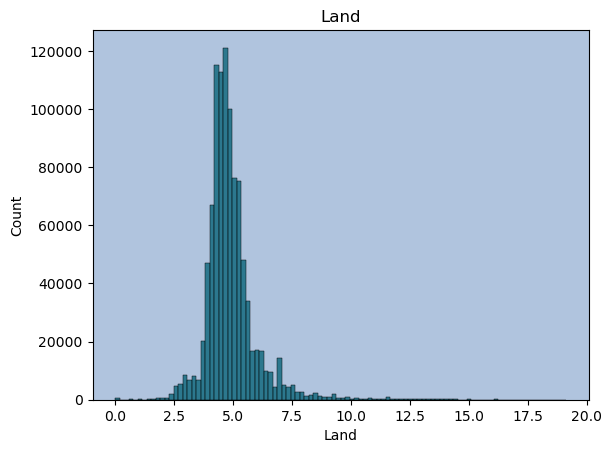

In [9]:
plt.title("Land")
sns.histplot(np.log(df_land_imp.Land), color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

c:\Users\USER\miniconda3\envs\accident_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


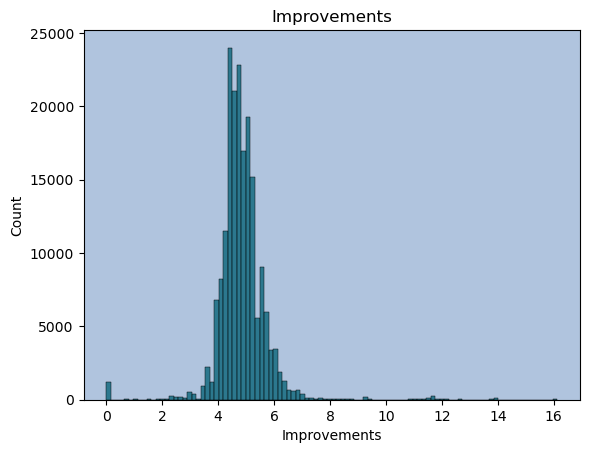

In [10]:
plt.title("Improvements")
sns.histplot(np.log(df_land_imp.Improvements), color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

In [907]:
clean_columns = df_subset.drop(["Unnamed: 0", "cat2_slug", "user_type", "description", "title", "rent_mode"], axis=1)

pd.DataFrame.to_csv(clean_columns, "cleaned_23_42.csv")